In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from ydata_profiling import ProfileReport

import warnings
import matplotlib
# warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

In [53]:
df = pd.read_csv("2010.csv")

In [54]:
profile = ProfileReport(df, title="Profile Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
df.head()

Number                       title         artist     top genre  year  bpm  \
0       1                     bad guy  Billie Eilish    electropop  2019  135   
1       2                     7 rings  Ariana Grande     dance pop  2019  140   
2       3       Old Town Road - Remix      Lil Nas X   country rap  2019  136   
3       4                   SeÃ±orita   Shawn Mendes  canadian pop  2019  117   
4       5  rockstar (feat. 21 Savage)    Post Malone       dfw rap  2018  160   

   nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0    43    70 -11    10   56  194     33    38   94  
1    32    78 -11     9   33  179     59    33   90  
2    62    88  -6    11   64  157      5    10   89  
3    55    76  -6     8   75  191      4     3   88  
4    52    59  -6    13   13  218     12     7   88

In [56]:
df.tail()

Number                              title            artist  top genre  \
95      96  Stereo Hearts (feat. Adam Levine)  Gym Class Heroes  dance pop   
96      97                           Dynamite         Taio Cruz  dance pop   
97      98                   Break Your Heart         Taio Cruz  dance pop   
98      99                         Summer Air     ItaloBrothers  dance pop   
99     100                     All I Wanna Do     Martin Jensen   big room   

    year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
95  2011   90    80    65  -3    27   80  211      3    10   56  
96  2011  120    79    76  -4     3   87  203      0     8   56  
97  2011  122    89    67  -5    24   68  185      0     3   54  
98  2017  102    75    76  -4     8   49  184      6     7   43  
99  2016  112    79    73  -4     7   56  194     16     7   32

In [57]:
df.shape

(100, 15)

In [58]:
# Checking Null values

df.isnull().sum()

Number       0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     100 non-null    int64 
 1   title      100 non-null    object
 2   artist     100 non-null    object
 3   top genre  100 non-null    object
 4   year       100 non-null    int64 
 5   bpm        100 non-null    int64 
 6   nrgy       100 non-null    int64 
 7   dnce       100 non-null    int64 
 8   dB         100 non-null    int64 
 9   live       100 non-null    int64 
 10  val        100 non-null    int64 
 11  dur        100 non-null    int64 
 12  acous      100 non-null    int64 
 13  spch       100 non-null    int64 
 14  pop        100 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 11.8+ KB


In [60]:
df1 = df.drop('dnce', axis=1)

In [61]:
df1

Number                              title            artist     top genre  \
0        1                            bad guy     Billie Eilish    electropop   
1        2                            7 rings     Ariana Grande     dance pop   
2        3              Old Town Road - Remix         Lil Nas X   country rap   
3        4                          SeÃ±orita      Shawn Mendes  canadian pop   
4        5         rockstar (feat. 21 Savage)       Post Malone       dfw rap   
..     ...                                ...               ...           ...   
95      96  Stereo Hearts (feat. Adam Levine)  Gym Class Heroes     dance pop   
96      97                           Dynamite         Taio Cruz     dance pop   
97      98                   Break Your Heart         Taio Cruz     dance pop   
98      99                         Summer Air     ItaloBrothers     dance pop   
99     100                     All I Wanna Do     Martin Jensen      big room   

    year  bpm  nrgy  dB  live  val  dur  acous  spch  pop  
0   2019  135    43 -11    10   56  194     33    38   94  
1   2019  140    32 -11     9   33  179     59    33   90  
2   2019  136    62  -6    11   64  157      5    10   89  
3   2019  117    55  -6     8   75  191      4     3   88  
4   2018  160    52  -6    13   13  218     12     7   88  
..   ...  ...   ...  ..   ...  ...  ...    ...   ...  ...  
95  2011   90    80  -3    27   80  211      3    10   56  
96  2011  120    79  -4     3   87  203      0     8   56  
97  2011  122    89  -5    24   68  185      0     3   54  
98  2017  102    75  -4     8   49  184      6     7   43  
99  2016  112    79  -4     7   56  194     16     7   32  

[100 rows x 14 columns]

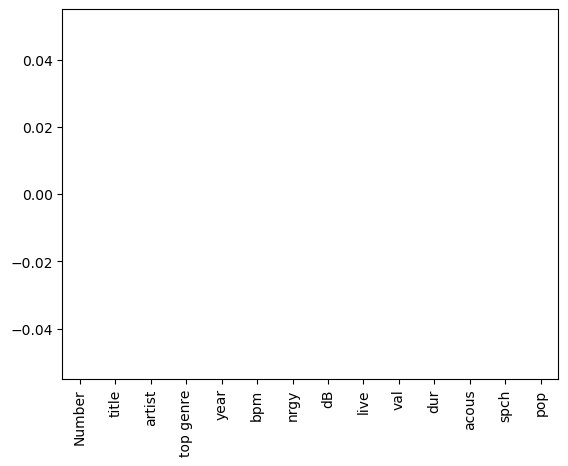

In [62]:
df1.dropna(inplace = True)
df1.isnull().sum().plot.bar()
plt.show()

In [63]:
# checking duplicates
df1['title'].nunique(), df1.shape

(100, (100, 14))

In [64]:
df1.duplicated().sum()

0

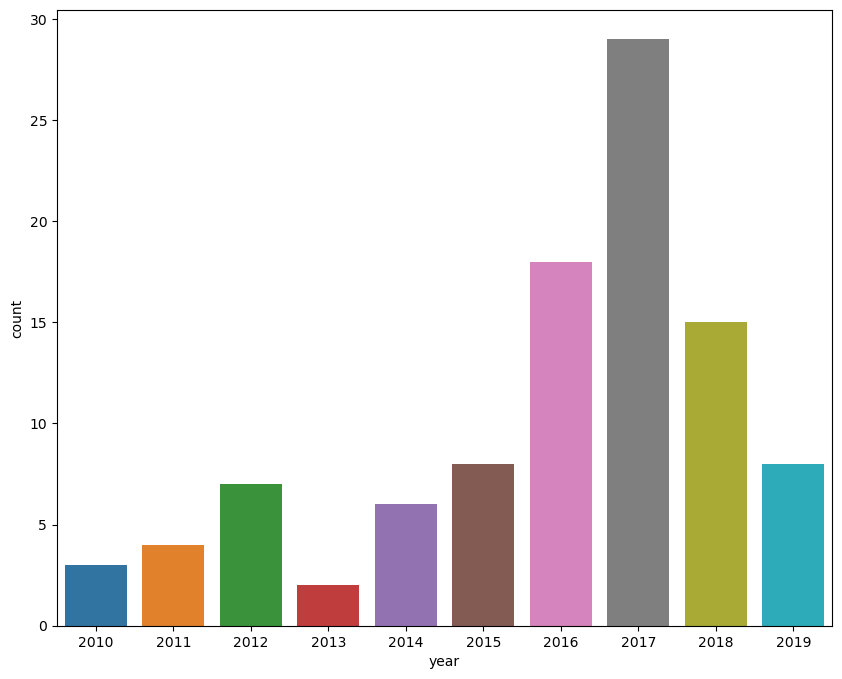

In [65]:
plt.figure(figsize=(10,8))
sb.countplot(x='year', data=df1)
plt.show()

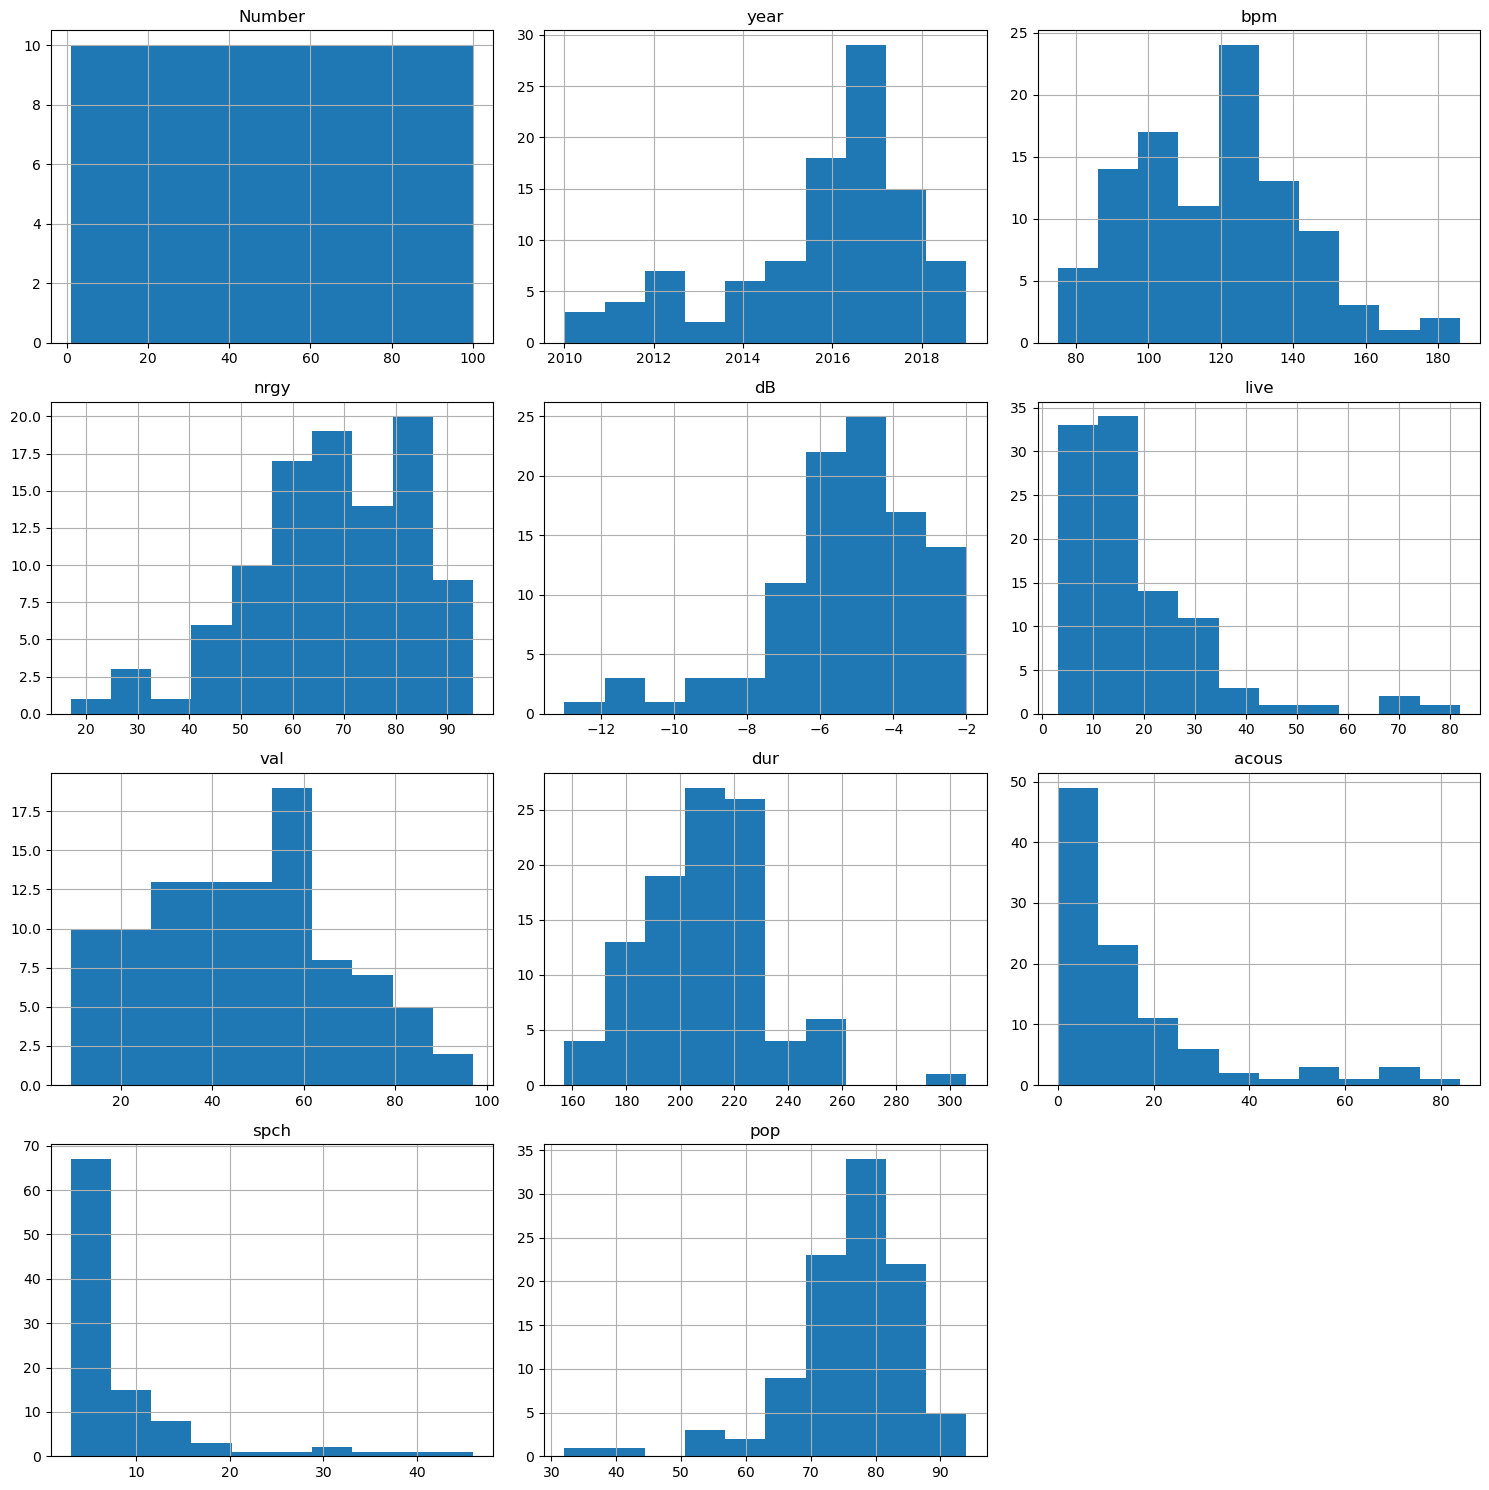

In [66]:
df1.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [67]:
df1 = df1.drop('Number', axis=1)

In [68]:
df1

title            artist     top genre  year  \
0                             bad guy     Billie Eilish    electropop  2019   
1                             7 rings     Ariana Grande     dance pop  2019   
2               Old Town Road - Remix         Lil Nas X   country rap  2019   
3                           SeÃ±orita      Shawn Mendes  canadian pop  2019   
4          rockstar (feat. 21 Savage)       Post Malone       dfw rap  2018   
..                                ...               ...           ...   ...   
95  Stereo Hearts (feat. Adam Levine)  Gym Class Heroes     dance pop  2011   
96                           Dynamite         Taio Cruz     dance pop  2011   
97                   Break Your Heart         Taio Cruz     dance pop  2011   
98                         Summer Air     ItaloBrothers     dance pop  2017   
99                     All I Wanna Do     Martin Jensen      big room  2016   

    bpm  nrgy  dB  live  val  dur  acous  spch  pop  
0   135    43 -11    10   56  194     33    38   94  
1   140    32 -11     9   33  179     59    33   90  
2   136    62  -6    11   64  157      5    10   89  
3   117    55  -6     8   75  191      4     3   88  
4   160    52  -6    13   13  218     12     7   88  
..  ...   ...  ..   ...  ...  ...    ...   ...  ...  
95   90    80  -3    27   80  211      3    10   56  
96  120    79  -4     3   87  203      0     8   56  
97  122    89  -5    24   68  185      0     3   54  
98  102    75  -4     8   49  184      6     7   43  
99  112    79  -4     7   56  194     16     7   32  

[100 rows x 13 columns]

In [69]:
df1 = df1.drop(['acous', 'spch'], axis=1)

In [70]:
df1

title            artist     top genre  year  \
0                             bad guy     Billie Eilish    electropop  2019   
1                             7 rings     Ariana Grande     dance pop  2019   
2               Old Town Road - Remix         Lil Nas X   country rap  2019   
3                           SeÃ±orita      Shawn Mendes  canadian pop  2019   
4          rockstar (feat. 21 Savage)       Post Malone       dfw rap  2018   
..                                ...               ...           ...   ...   
95  Stereo Hearts (feat. Adam Levine)  Gym Class Heroes     dance pop  2011   
96                           Dynamite         Taio Cruz     dance pop  2011   
97                   Break Your Heart         Taio Cruz     dance pop  2011   
98                         Summer Air     ItaloBrothers     dance pop  2017   
99                     All I Wanna Do     Martin Jensen      big room  2016   

    bpm  nrgy  dB  live  val  dur  pop  
0   135    43 -11    10   56  194   94  
1   140    32 -11     9   33  179   90  
2   136    62  -6    11   64  157   89  
3   117    55  -6     8   75  191   88  
4   160    52  -6    13   13  218   88  
..  ...   ...  ..   ...  ...  ...  ...  
95   90    80  -3    27   80  211   56  
96  120    79  -4     3   87  203   56  
97  122    89  -5    24   68  185   54  
98  102    75  -4     8   49  184   43  
99  112    79  -4     7   56  194   32  

[100 rows x 11 columns]

In [71]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(df1['top genre'])

In [72]:
df1 = df1.sort_values(by=['pop'], ascending=False)
df1

title            artist     top genre  year  \
0                             bad guy     Billie Eilish    electropop  2019   
1                             7 rings     Ariana Grande     dance pop  2019   
2               Old Town Road - Remix         Lil Nas X   country rap  2019   
3                           SeÃ±orita      Shawn Mendes  canadian pop  2019   
4          rockstar (feat. 21 Savage)       Post Malone       dfw rap  2018   
..                                ...               ...           ...   ...   
95  Stereo Hearts (feat. Adam Levine)  Gym Class Heroes     dance pop  2011   
96                           Dynamite         Taio Cruz     dance pop  2011   
97                   Break Your Heart         Taio Cruz     dance pop  2011   
98                         Summer Air     ItaloBrothers     dance pop  2017   
99                     All I Wanna Do     Martin Jensen      big room  2016   

    bpm  nrgy  dB  live  val  dur  pop  
0   135    43 -11    10   56  194   94  
1   140    32 -11     9   33  179   90  
2   136    62  -6    11   64  157   89  
3   117    55  -6     8   75  191   88  
4   160    52  -6    13   13  218   88  
..  ...   ...  ..   ...  ...  ...  ...  
95   90    80  -3    27   80  211   56  
96  120    79  -4     3   87  203   56  
97  122    89  -5    24   68  185   54  
98  102    75  -4     8   49  184   43  
99  112    79  -4     7   56  194   32  

[100 rows x 11 columns]

In [73]:
def get_similarities(song_name, data):

# Getting vector for the input song.
    text_array1 = song_vectorizer.transform(data[data['title']==song_name]['top genre']).toarray()
    num_array1 = data[data['title']==song_name].select_dtypes(include=np.number).to_numpy()

# We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
        name = row['title']
        
        # Getting vector for current song.
        text_array2 = song_vectorizer.transform(data[data['title']==name]['top genre']).toarray()
        num_array2 = data[data['title']==name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
        
    return sim

In [74]:
def recommend_songs(song_name, data=df1):
    # Base case
    if df1[df1['title'] == song_name].shape[0] == 0:
        print('This song is either not so popular or you have entered an invalid name.\nSome songs you may like:\n')

        for song in data.sample(n=5)['title'].values:
            print(song)
        return

    data['similarity_factor'] = get_similarities(song_name, data)

    data.sort_values(by=['similarity_factor', 'pop'],
                      ascending=[False, False],
                      inplace=True)

    # First song will be the input song itself as the similarity will be highest.
    display(data[['title', 'artist']].head(5))

In [75]:
recommend_songs("senorita")

This song is either not so popular or you have entered an invalid name.
Some songs you may like:

IDGAF
Never Forget You
I Dont Wanna Live Forever (Fifty Shades Darker)
Dynamite
Love Lies (with Normani)
